In [1]:
import pickle

data = None
labels = None

path = ''

with open(path+'img_data','rb') as f:
    data = pickle.load(f)
with open(path+'img_labels','rb') as f:
    labels = pickle.load(f)
    
print(data.shape, labels.shape)

(5966, 5120) (5966,)


In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

Using TensorFlow backend.
(4563, 5120) (4563, 4)
(508, 5120) (508, 4)
(895, 5120) (895, 4)


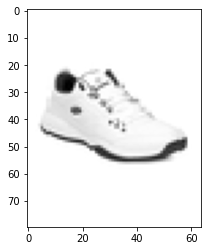

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

plt.imshow(x_train[10].reshape((80,64)), cmap='gray')

In [5]:
from keras.layers import Flatten, Dense
from keras import Sequential
import keras

NUM_EPOCHS=50

1. One hidden layer -> Fully Dense Network

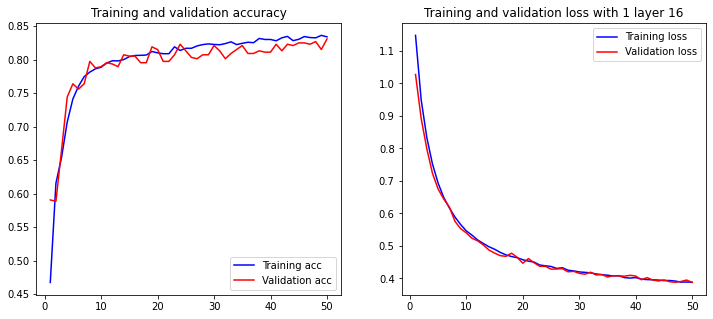

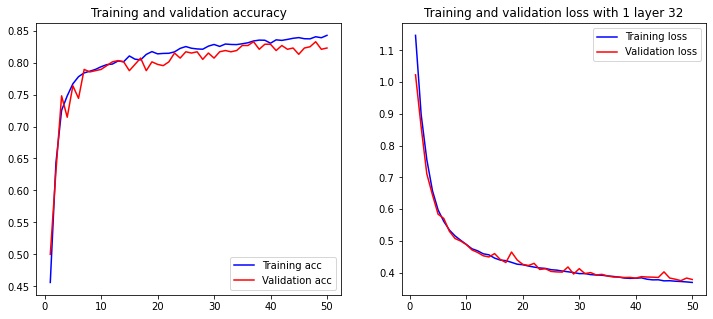

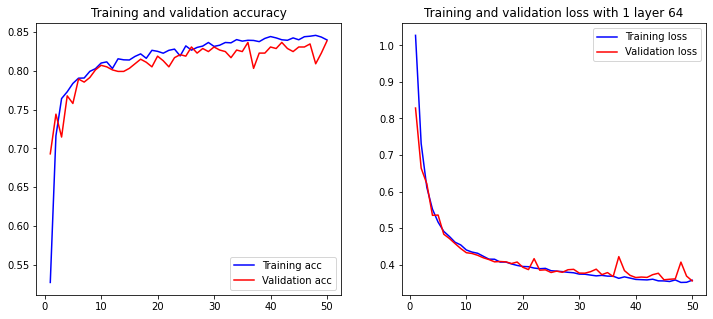

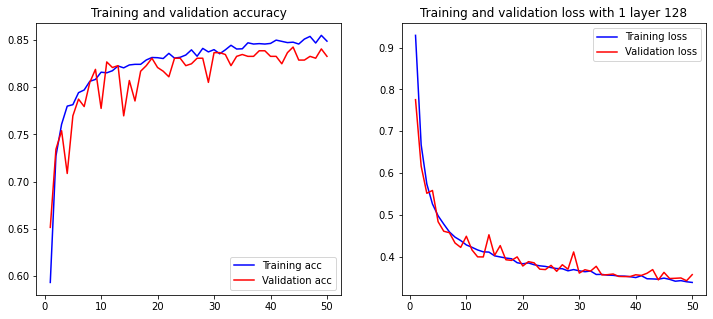

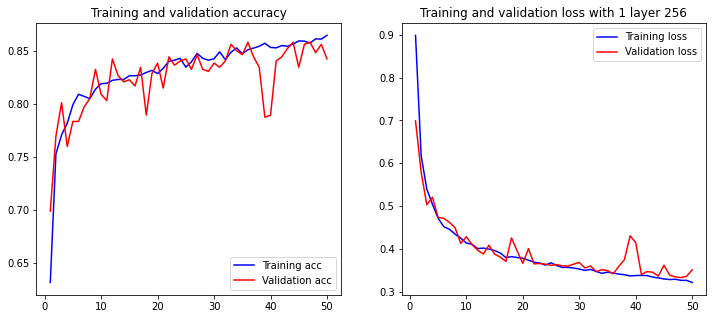

In [ ]:
for ne in [16, 32, 64, 128, 256]:
    model = Sequential([
                        Dense(ne, activation='relu', input_dim=x_train.shape[1]),
                        Dense(4, activation='softmax')
    ])

    adam = keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    # model.summary()

    history = model.fit(x_train, y_train, batch_size=16, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid), verbose=0)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss with 1 layer ' + str(ne))
    plt.legend()
    plt.show()
    plt.ion()

2. Deep Dense Network with 128 neurons

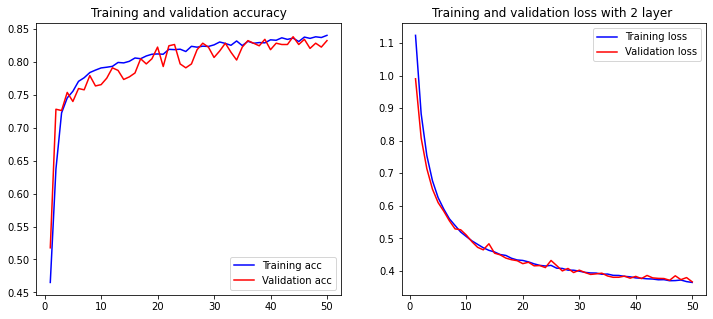

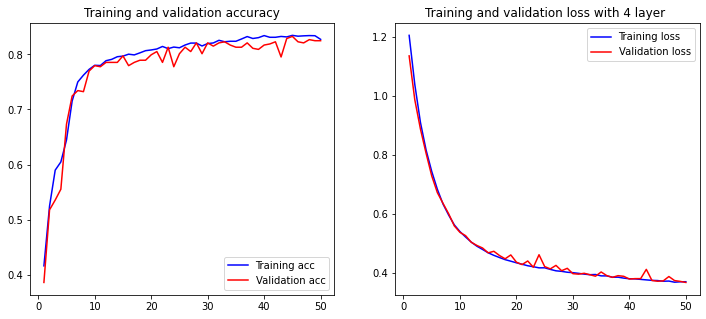

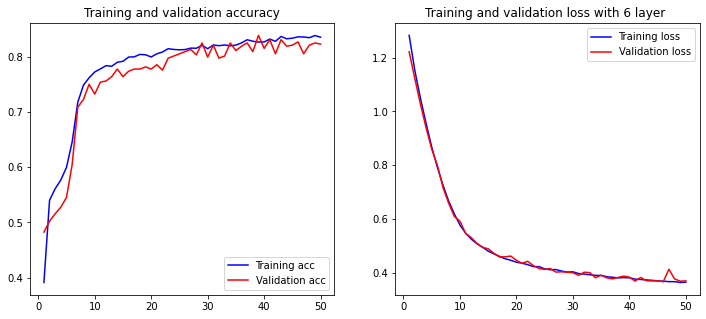

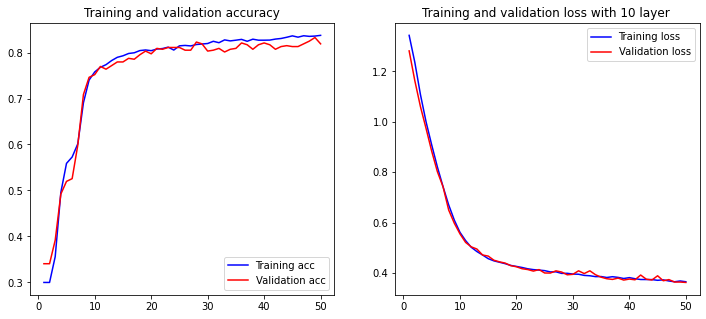

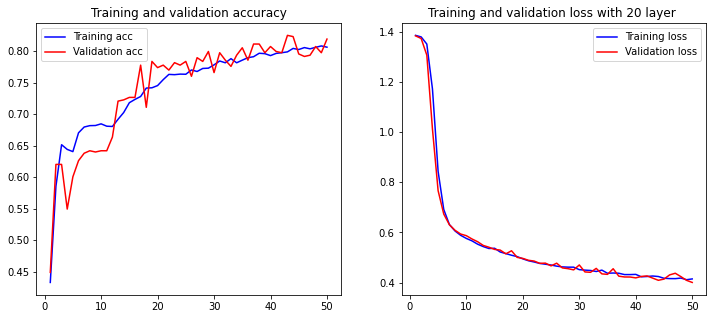

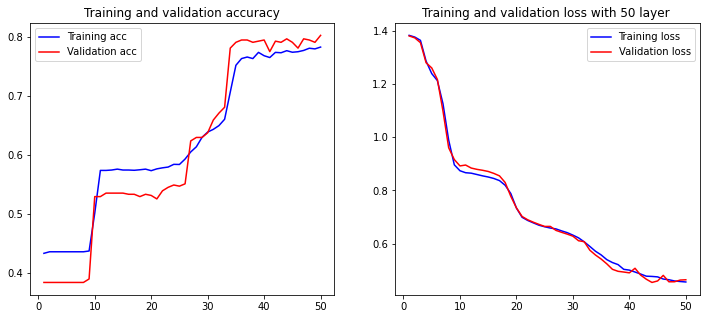

In [ ]:
for ne in [2, 4, 6, 10, 20, 50]:
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
    ne -= 1
    for l in range(0, ne):
            model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])

    #model.summary()

    history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid), verbose=0)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss with ' + str(ne+1) + ' layer ' )
    plt.legend()
    plt.show()
    plt.ion()

In [9]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

x_train = np.concatenate((x_train,x_valid),axis=0)
y_train = np.concatenate((y_train,y_valid),axis=0)

scores = []
for i in range(0,10):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()

    hist = model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_split=0.1, use_multiprocessing=True, verbose=0)

    score = np.mean(hist.history['val_accuracy'][-4:])
    print(score)
    scores.append(score)

y_pred = model.predict(x_test)

0.836614191532135
0.8410433232784271
0.8316929191350937
0.8444882035255432
0.8415354490280151
0.8464567065238953
0.835137814283371
0.8400590717792511
0.838090568780899
0.8489173352718353


In [10]:
import numpy as np

y_test_cp = np.argmax( y_test, axis=1)
y_pred_cp = np.argmax( y_pred, axis=1)
print()
dt = pd.DataFrame(confusion_matrix(y_test_cp, y_pred_cp))
display(dt)
print(classification_report(y_test_cp, y_pred_cp, zero_division=0))

,0,1,2,3
0,114,0,1,1
1,0,329,55,1
2,5,65,204,0
3,1,0,0,119


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       116
           1       0.84      0.85      0.84       385
           2       0.78      0.74      0.76       274
           3       0.98      0.99      0.99       120

    accuracy                           0.86       895
   macro avg       0.89      0.89      0.89       895
weighted avg       0.85      0.86      0.85       895



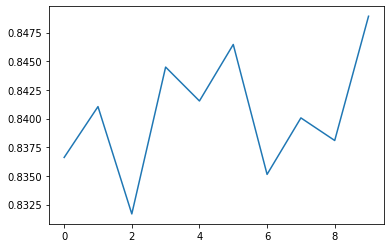

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(scores)
plt.show()

In [ ]:
import pickle

with open('CLF_denseNN','wb') as f:
    pickle.dump(model, f)